In [5]:
import json
import matplotlib.pyplot as plt 


In [6]:
with open(r'F:\mgr\multiclasstest\20240412_101051.log.json', 'r') as f:
    # Read each line and parse it as JSON
    data = [json.loads(line) for line in f]

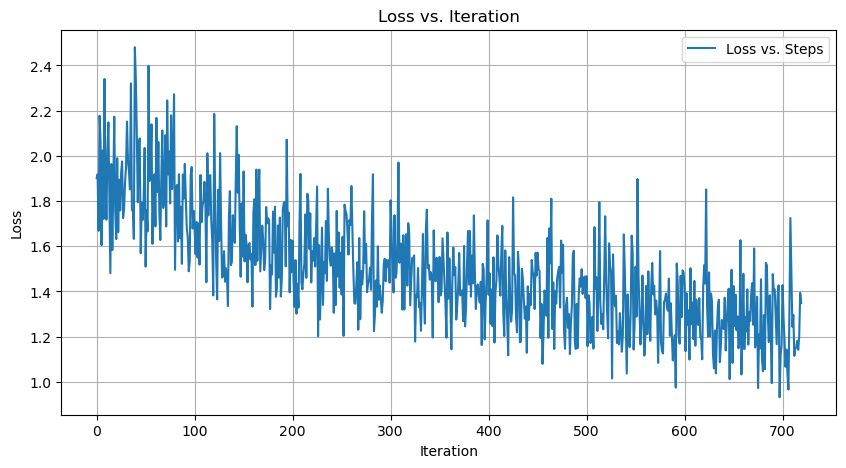

In [7]:
iters = []
losses = []

# Iteracja przez dane
for entry in data:
    if 'iter' in entry and 'loss' in entry:
        iters.append(entry["iter"])
        losses.append(entry["loss"])

# Wykres losu w zależności od 'iter'
plt.figure(figsize=(10, 5))
plt.plot(range(len(losses)), losses, label='Loss vs. Steps')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.legend()
plt.grid(True)
plt.show()

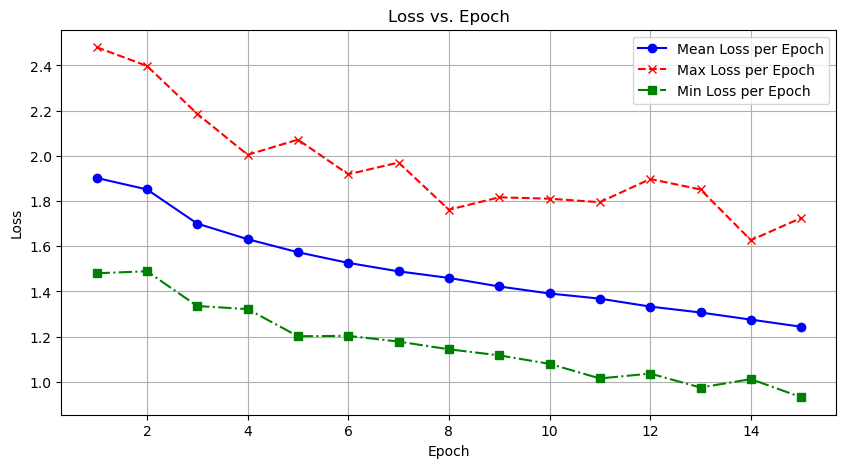

In [8]:
epoch_losses = {}
for entry in data:
    if 'epoch' in entry and 'loss' in entry:
        epoch = entry['epoch']
        loss = entry['loss']
        if epoch not in epoch_losses:
            epoch_losses[epoch] = []
        epoch_losses[epoch].append(loss)

# Obliczenie średniego lossa dla każdej epoki
mean_epoch_losses = [(epoch, sum(losses) / len(losses), max(losses), min(losses)) for epoch, losses in epoch_losses.items()]

# Rozdzielenie epok i średnich lossów, maksymalnych i minimalnych
epochs, mean_losses, max_losses, min_losses = zip(*mean_epoch_losses)

# Wykres średniego, maksymalnego i minimalnego lossa w zależności od epoki
plt.figure(figsize=(10, 5))
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.plot(epochs, max_losses, marker='x', linestyle='--', color='r', label='Max Loss per Epoch')
plt.plot(epochs, min_losses, marker='s', linestyle='-.', color='g', label='Min Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()
